In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
df=pd.read_csv('co2.csv')

In [253]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [254]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [255]:
df=df[(df['Make']=='ACURA') | (df['Make']=='BENTLEY') | (df['Make']=='HONDA') | (df['Make']=='ASTON MARTIN') |
(df['Make']=='FIAT') | (df['Make']=='PORCHE')]


In [256]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [257]:
df['Make']=df['Make'].map({'ACURA':0, 'HONDA':0, 'FIAT': 0, 'BENTLEY':1, 'ASTON MARTIN':1, 'PORCHE':1})

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

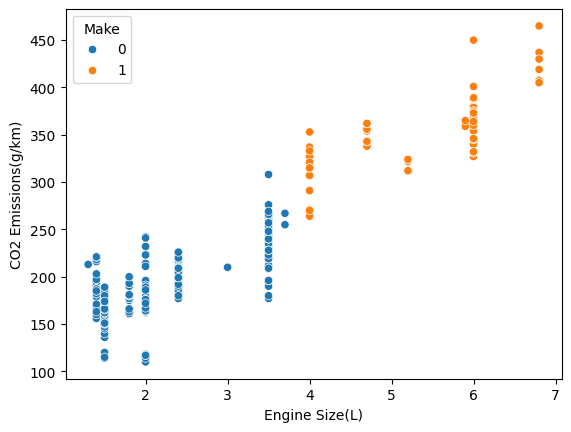

In [258]:

sns.scatterplot(x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)'], hue=df['Make'])

In [259]:
df = df[['Make', 'Engine Size(L)', 'CO2 Emissions(g/km)']]

In [260]:
df1=df

In [261]:
split_idx = int(0.7 * len(df))
print(split_idx)
df= df.iloc[:split_idx,:]
test = df1.iloc[split_idx:,:]


316


In [262]:
arr=np.array(df.drop(['Make'], axis=1))

In [263]:
y=df['Make']
y=np.array(y)

def compute_gradient(X, y, w, b):
  m,n=X.shape
  dj_dw = np.zeros((n,))
  dj_dw = np.array(dj_dw, dtype=np.float64)
  w = np.array(w, dtype=np.float64)
  dj_db=0.
  for i in range(m):
    z=np.dot(w,X[i])+b
    err=(1/(1+np.exp(z)))-y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err*X[i, j]
    dj_db=dj_db+err

  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw, dj_db


In [264]:
def gradient_descent():
  m,n=arr.shape
  w=np.zeros((n,))
  w = np.array(w, dtype=np.float64)
  b=0
  for i in range(10000):
    dj_dw, dj_db=compute_gradient(arr, y, w, b)
    w=w-0.00001*dj_dw
    b=b-0.00001*dj_db

  return w, b


In [265]:
W, B=gradient_descent()

In [266]:
print(W)
print(B)

[ -0.16848188 -15.09026887]
-0.07685171634572623


In [267]:
arr1=np.array(test.drop(['Make'], axis=1))

In [268]:
m,n=arr1.shape

In [269]:
y_pred=np.zeros((m,))

In [270]:
for i in range (m):
  z=np.dot(W,arr1[i])+B
  y_pred[i]=1/(1+np.exp(-z))


<ipython-input-270-a1623bda5a72>:3: RuntimeWarning: overflow encountered in exp
  y_pred[i]=1/(1+np.exp(-z))


In [271]:
y_test=np.array(test['Make'])
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.29%
